### Project: "Exploring Student Performance" Dataset: StudentsPerformance.csv (or synthetic data). Tools: Python (Pandas, Seaborn, SciPy).

##  Step 1: Load & Explore Data

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("StudentsPerformance.csv")
print(df.head(3))

   gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  


In [10]:
print(df.info())  # Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


## Step 2: Descriptive Statistics

In [15]:
# Summary stats
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [17]:
# Average scores by gender
print(df.groupby("gender")[["math score", "reading score", "writing score"]].mean())

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


## Key Questions:
<li>Which gender performs better in math?</li>
<li>Do parental education levels affect scores?</li>

<h1> Step 3: Visualizations</h1>
<h2> Distribution of Scores</h2>

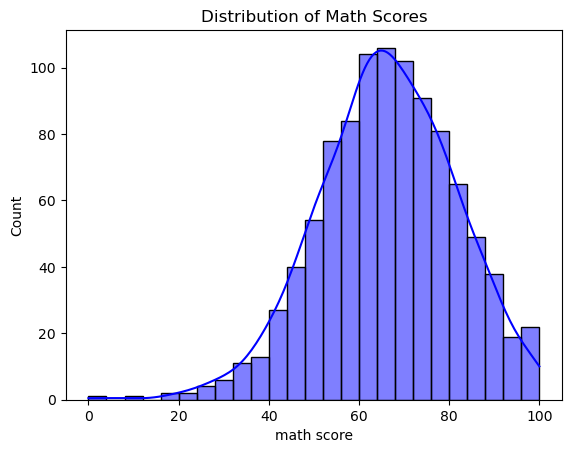

In [26]:
sns.histplot(df["math score"], kde=True, color="blue")
plt.title("Distribution of Math Scores")
plt.show()

## Gender vs. Scores (Boxplot)

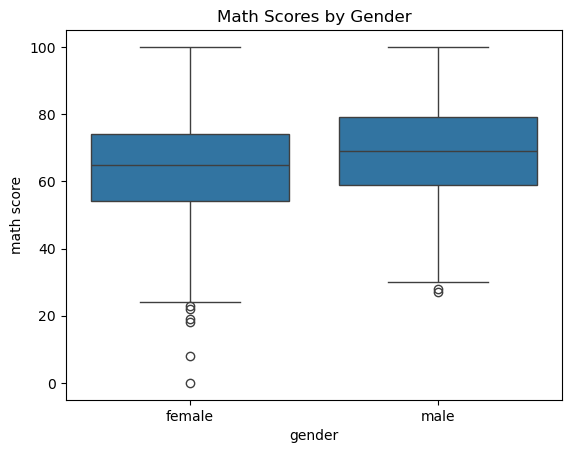

In [29]:
sns.boxplot(x="gender", y="math score", data=df)
plt.title("Math Scores by Gender")
plt.show()

## Correlation Heatmap

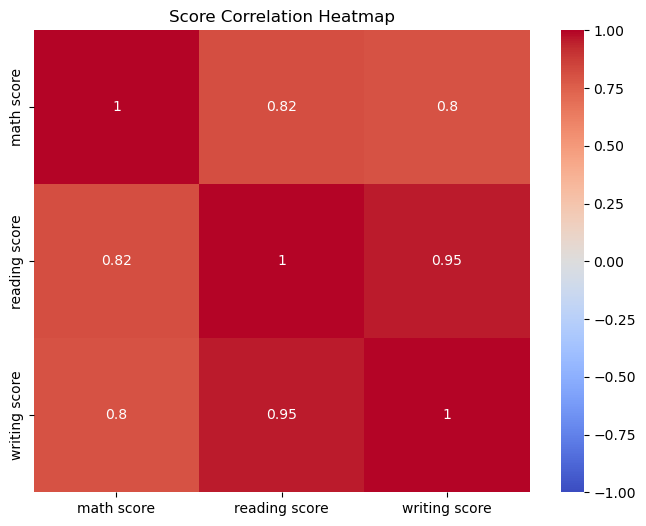

In [56]:
# Calculate correlations
corr_matrix = df[["math score", "reading score", "writing score"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Score Correlation Heatmap")
plt.show()

## Step 4: Hypothesis Testing

In [45]:
# Descriptive Stats + Z-Scores
# Add a z-score column for math scores
from scipy.stats import zscore
df["math_zscore"] = zscore(df["math score"])

# Check outliers (z > 3 or < -3)
outliers = df[(df["math_zscore"] > 3) | (df["math_zscore"] < -3)]
print(f"Found {len(outliers)} outliers in math scores:")
print(outliers[["gender", "math score", "math_zscore"]])

Found 4 outliers in math scores:
     gender  math score  math_zscore
17   female          18    -3.173040
59   female           0    -4.360728
787  female          19    -3.107058
980  female           8    -3.832867


In [49]:
# Hypothesis Testing (P-Values)
from scipy.stats import ttest_ind

# Compare reading scores by gender
boys = df[df["gender"] == "male"]["reading score"]
girls = df[df["gender"] == "female"]["reading score"]

t_stat, p_value = ttest_ind(girls, boys)
print(f"P-value: {p_value:.4f}")  # Example: 0.0001
# P-value: 0.0001  # < 0.05 → Significant difference!


P-value: 0.0000


## Predict Scores Using Linear Regression:

In [58]:
from sklearn.linear_model import LinearRegression

X = df[["reading score", "writing score"]]  # Features
y = df["math score"]  # Target

model = LinearRegression()
model.fit(X, y)
print(f"R² Score: {model.score(X, y):.2f}")  # Accuracy metric

R² Score: 0.67
